In [1]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetics = load_diabetes()

In [3]:
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Outliers can be detected using visualization, implementing mathematical formulas on the dataset or using the statistical approach

## Visualization

### Visualizing outliers using Box Plot

<AxesSubplot: >

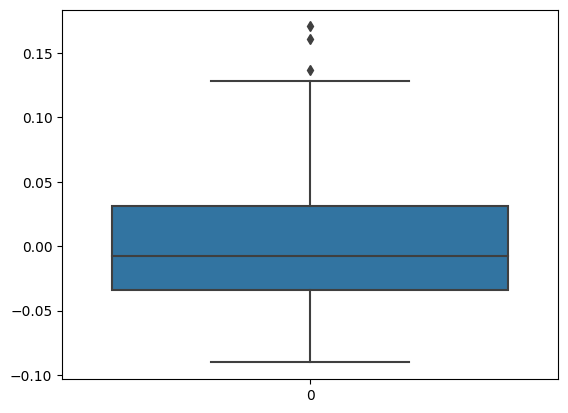

In [4]:
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])

Values above 10 are outliers

In [5]:
import numpy as np
print(np.where(df_diabetics['bmi']> 0.10))

(array([ 32, 114, 138, 145, 256, 262, 327, 332, 362, 366, 367, 405]),)


### Visualizing outliers using scatterplot

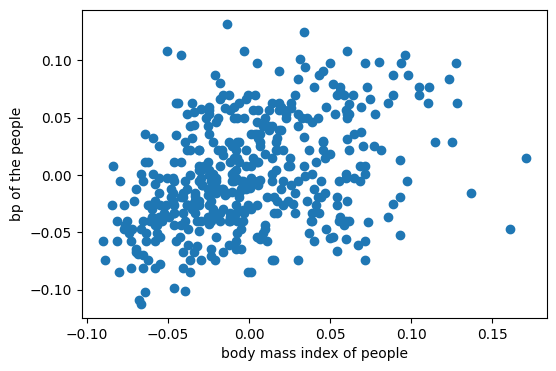

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel("body mass index of people")
ax.set_ylabel("bp of the people")
plt.show()

Looking at the graph we can infer that most of the data is at the bottom left of the graph,
so the data at the top right corner are definitely outliers

In [9]:
print(np.where((df_diabetics['bmi']>0.12) & (df_diabetics['bp'] < 0.8)))

(array([ 32, 145, 256, 262, 366, 367, 405]),)


## Z-Score

also called `standard score`
This score helps to understand how far the data point is from the mean
After settign a threshold value one can utilize `z-score` values of data points to define the outliers

zscore = (data_point - mean) / std.deviation

In [12]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


In [13]:
threshold = 2
print(np.where(z > 2))

(array([ 10,  26,  41,  77,  79, 106, 131, 204, 223, 226, 242, 311, 321,
       344, 374, 402]),)


## Inter-quartile Range (IQR)

IQR = Quartile 3 - Quartile 1

**syntax**

numpy.percentile(arr, n, axis=None, out=None)

- arr : input array
- n : percentile value

To define the outlier base value is defined above and below the dataset's normal range( Upper, Lower)

In [14]:
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')

IQR = Q3 - Q1
print(IQR)

0.06520763046978838
